# Moving Average Model

* [PennState STAT 510 - Moving Average Models(MA Models)](https://onlinecourses.science.psu.edu/stat510/node/48)

* [Numpy Cookbook 참고](https://books.google.co.kr/books?id=zWHCCAAAQBAJ&pg=PA222&lpg=PA222&dq=numpy+%22moving+average+model%22&source=bl&ots=VWJa0wmEaP&sig=l_pgyToRagDVGnHA_UUo5DO0Ofg&hl=en&sa=X&ved=0ahUKEwig--Ppw4_VAhWIUrwKHWShDQoQ6AEIOTAE#v=onepage&q=numpy%20%22moving%20average%20model%22&f=false)

Moving-average Model MA(q)는 AR(p)와 매우 유사하며 마찬가지로 univariate time series를 모델링 하는데 사용되는 방법중의 하나입니다. <br>
두 모델의 차이점은 MA(q) 모델의 경우 과거의 white noise error를 사용합니다. <br>
<span style="color:red">즉 AR(p)의 경우 과거 p값 만큼의 과거의 lagged variables사용해서 예측을 하는 반면, <br>
MA(q) 모델은 과거의 예측 에러(forecast errors)에서 나온 값을 사용해서 예측을 합니다.</span>

AR Model과 함께 ARMA 그리고 ARIMA 모델의 중요 컴포넌트가 됩니다.<br> 

> Moving Average Model은 Moving Average와 전혀 다릅니다.

## Definition

MA(q) 모델은 noise에 관하여 $ X_t $에 대해 다음과 같이 정의를 하고 있습니다.

$$ X_t = c + \epsilon_t + \beta_1 \epsilon_{t-1} + ... + \beta_q \epsilon_{t-q} $$


$ \epsilon $ 기호는 error (white noise)로 읽으면 됩니다. (epsilon이 아니라..) <br>
$ \epsilon $ 는 편차(deviations of mean values 구해지지만 전체 시간을 모두 구하는 것이 아니라, average moving $ t $ 그리고 $ q+1 $ times가 사용됩니다.<br>
time lags를 사용하여 다음과 같이 정의 할 수 있습니다.

$$ X_t = c+ \left(1 + \sum^q_{k=1} \beta_k L^k \right) \epsilon_t $$

## Configuration

In [3]:
LAG = 12

## Import

In [4]:
%pylab inline
import math
import pandas as pd
import statsmodels.api as sm

from scipy.optimize import leastsq
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from data import get_data, diff, show_diff
from tool import show_result

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data

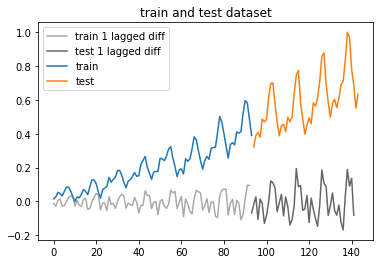

In [9]:
filename = 'dataset/international-airline-passengers.csv'
dataframe, train, test, ts_train, ts_test = get_data(filename, LAG)

train = train.reshape(-1)
test = test.reshape(-1)
train_diff = diff(train ,lag=1)
test_diff = diff(test ,lag=1)

# Visualization
show_diff(train_diff, test_diff)    
plot(np.arange(len(train)), train, label='train')
plot(np.arange(len(train), len(train)+len(test)), test, label='test')

legend()
title('train and test dataset')

## Implementing MA Model

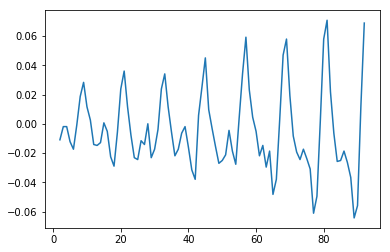

In [286]:
WINDOW = 3
moving_avg = pd.Series(train_diff).rolling(window=WINDOW).mean().as_matrix()




leastsq

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     26.75
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           1.42e-06
Time:                        16:36:27   Log-Likelihood:                 188.53
No. Observations:                  91   AIC:                            -373.1
Df Residuals:                      89   BIC:                            -368.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.003      1.082      0.282      -0.003       0.010
x1             0.4608      0.089      5.172      0.000       0.284       0.638
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.395
Skew:                          -0.106   Prob(JB):                        0.821
Kurtosis:                       3.243   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

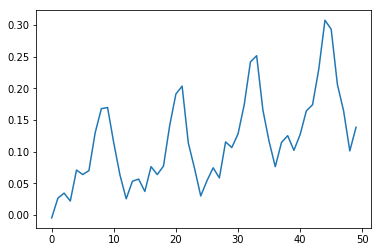

In [246]:
WINDOW = 3
moving_avg = pd.Series(train).rolling(window=WINDOW).mean().as_matrix()

ols = sm.OLS(train[WINDOW-1:-1] - moving_avg[WINDOW-1:-1], 
             sm.add_constant(train[WINDOW:] -  moving_avg[WINDOW:])).fit()

display(ols.summary())
def predict_ma(ma, length=50):
    pass

plot(ols.predict(sm.add_constant(test)))

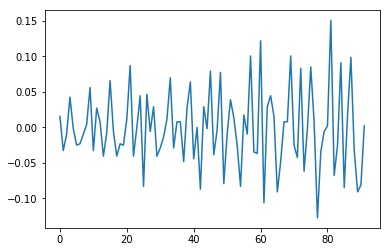

In [230]:
train = train[:-1] - train[1:]
plot(train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   92
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 159.398
Method:                       css-mle   S.D. of innovations              0.042
Date:                Wed, 09 Aug 2017   AIC                           -308.797
Time:                        17:17:02   BIC                           -296.188
Sample:                             1   HQIC                          -303.708
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.778e-06      0.000     -0.050      0.960      -0.000       0.000
ar.L1.D.y      0.3170      0.103      3.084      0.003       0.116       0.519
ar.L2.D.y     -0.2428      0.106     -2.298      0.024      -0.450      -0.036
ma.L1.D.y     -1.0000      0.028    -35.954      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6528           -1.9214j            2.0293           -0.1979
AR.2            0.6528           +1.9214j            2.0293            0.1979
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

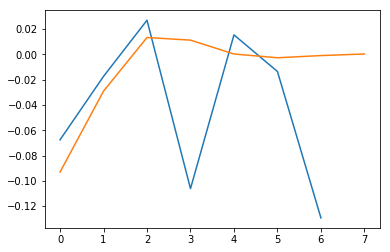

In [326]:
arima = sm.tsa.ARIMA(train_diff, order=(2, 1, 1)).fit()
display(arima.summary())

plot(test_diff[:7])
plot(arima.predict(start=len(train_diff), end=len(train_diff) + 7))

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:829: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:                     ARMA(6, 6)   Log Likelihood                 180.927
Method:                       css-mle   S.D. of innovations                nan
Date:                Wed, 09 Aug 2017   AIC                           -333.854
Time:                        17:20:15   BIC                           -298.398
Sample:                             0   HQIC                          -319.538
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053        nan        nan        nan         nan         nan
ar.L1.y        0.3297      0.383      0.860      0.392      -0.422       1.081
ar.L2.y       -0.6196        nan        nan        nan         nan         nan
ar.L3.y       -0.0380      0.218     -0.174      0.862      -0.466       0.390
ar.L4.y       -0.3970      0.153     -2.592      0.011      -0.697      -0.097
ar.L5.y        0.1491      0.216      0.691      0.492      -0.274       0.572
ar.L6.y        0.0473      0.097      0.489      0.626      -0.142       0.237
ma.L1.y       -0.3898      0.445     -0.876      0.384      -1.262       0.483
ma.L2.y        0.1881        nan        nan        nan         nan         nan
ma.L3.y       -0.0809        nan        nan        nan         nan         nan
ma.L4.y       -0.3521      0.096     -3.668      0.000      -0.540      -0.164
ma.L5.y       -0.2915      0.189     -1.546      0.126      -0.661       0.078
ma.L6.y       -0.3825      0.170     -2.248      0.027      -0.716      -0.049
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5205           -0.9297j            1.0654           -0.1688
AR.2            0.5205           +0.9297j            1.0654            0.1688
AR.3           -0.7217           -1.0935j            1.3102           -0.3428
AR.4           -0.7217           +1.0935j            1.3102            0.3428
AR.5            2.1944           -0.0000j            2.1944           -0.0000
AR.6           -4.9460           -0.0000j            4.9460           -0.5000
MA.1            0.9352           -0.0000j            0.9352           -0.0000
MA.2            0.4054           -0.9891j            1.0689           -0.1881
MA.3            0.4054           +0.9891j            1.0689            0.1881
MA.4           -1.3351           -0.0000j            1.3351           -0.5000
MA.5           -0.5865           -1.2201j            1.3538           -0.3213
MA.6           -0.5865           +1.2201j            1.3538            0.3213
-----------------------------------------------------------------------------
"""

TypeError: object of type 'method' has no len()

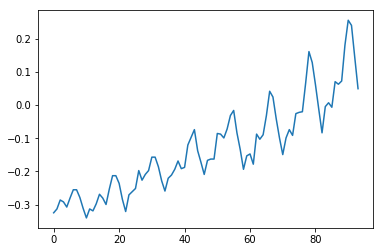

In [327]:
arma = sm.tsa.ARMA(train_diff, order=(6,6)).fit(
    transparams=False, enforce_stationaryity=False, enforce_invertibility=False)
display(arma.summary())
plot(train)
plot(arma.predict(start=0, end=len(train) + len(test)))


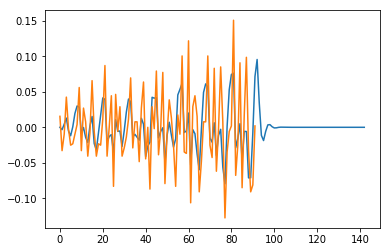

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  if __name__ == '__main__':


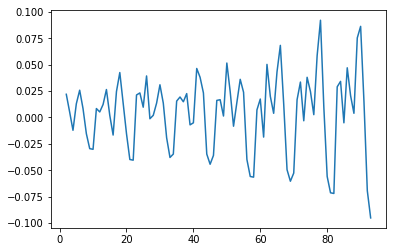

In [59]:
plot(train.reshape(-1) - )


In [4]:
d = pd.Series(train.reshape(-1))
diff = d - d.shift(1)

np.array(diff.data.tolist())

array([        nan,  0.01158301,  0.02702703, -0.00579151, -0.01544402,
        0.02702703,  0.02509653,  0.        , -0.02316602, -0.03281853,
       -0.02895753,  0.02702703, -0.00579151,  0.02123552,  0.02895753,
       -0.01158301, -0.01930502,  0.04633205,  0.04054054,  0.        ,
       -0.02316602, -0.04826255, -0.03667954,  0.05019305,  0.00965251,
        0.00965251,  0.05405405, -0.02895753,  0.01737452,  0.01158301,
        0.04054054,  0.        , -0.02895753, -0.04247104, -0.03088803,
        0.03861004,  0.00965251,  0.01737452,  0.02509653, -0.02316602,
        0.003861  ,  0.06756757,  0.02316602,  0.02316602, -0.06370656,
       -0.03474903, -0.03667954,  0.04247104,  0.003861  ,  0.        ,
        0.07722008, -0.0019305 , -0.01158301,  0.02702703,  0.04054054,
        0.01544402, -0.06756757, -0.05019305, -0.05984556,  0.04054054,
        0.00579151, -0.03088803,  0.09073359, -0.01544402,  0.01351351,
        0.05791506,  0.07335907, -0.01737452, -0.06563707, -0.05

(93, 1)


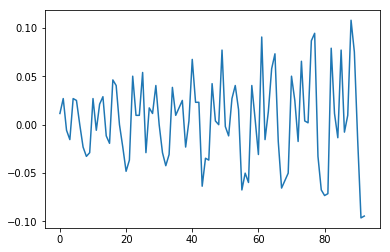

In [5]:
x = np.array([1, 3, 5, 7, 9, 11, 13, 17])
train_diff = np.diff(train, n=1, axis=0)
print(train_diff.shape)
plot(train_diff)

In [6]:
sm.tsa.ARMA()

statsmodels.tsa.arima_model.ARMA

In [7]:
from scipy.optimize import leastsq
from statsmodels.regression.linear_model import GLS

class MA(object):
    def __init__(self, lag=5):
        self.lag = lag
        self.w = np.random.rand(lag)
        print(self.w)
        
    def fit(self, x):
        mean = x.mean()
        a, b = leastsq(self.error, self.w, args=(x-mean,) )
        
        gls = GLS(x[1:], x[:-1]).fit()
        print(gls.params)
        return gls
        
        
    def error(self, w, x):
        return w * x[:self.lag].reshape(-1)
        
ma = MA()
gls = ma.fit(train)



[ 0.58791367  0.41727615  0.56300872  0.2326607   0.10319177]
[ 0.9579881]


In [8]:
model_arma = ARMA(train, order=(4, 2, 1))
model_arma = model_arma.fit(max_lag=30)
print(model_arma.summary())

pred_train = model_arma.predict(0)
pred_test = model_arma.predict(start=len(train), end=len(train) + len(test)-1)

x_train = np.arange(len(pred_train))
x_test = np.arange(len(pred_train), len(pred_train) + len(pred_test))

plot(x_train, train, linestyle="--", label='train_true', color="#555555")
plot(x_train, pred_train, label='train_pred', color='blue')
plot(x_test, test, label='test_true',  color='#555555')
plot(x_test, pred_test, label='pred_test', color='red')
legend()
grid()

print('Lag:', model_arma.k_ar)
print('Params:', model_arma.params.shape)
print('Train R^2:', r2_score(pred_train, train))
print('Train MSE:', mean_squared_error(pred_train, train))
print('Test  R^2:', r2_score(pred_test, test))
print('Test  MSE:', mean_squared_error(pred_test, test))

NameError: name 'ARMA' is not defined